# How Does Gender Inequality Impact Adolescent Birth Rates?
## An Analysis Using Linear Regression

## Imports

In [62]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)
plt.style.use('ggplot')

## The Data

The data I gathered is from the United Nations Human Development reports (http://hdr.undp.org/en/statistics/data/). We will use the Gender Inequality Index as our predictor variable; this index is composed of five variables measuring aspects of women's reproductive heath, empowerment, and labor force participation, and has a range of approximately 0-100, with lower numbers signifing greater equality. 

The adolescent birth rate is measured as the number of births per 1,000 women aged 15-19.

In [23]:
data = pd.read_csv('Data/Adolescent birth rate.csv')
data.head()

,HDI Rank (2018),Country,1990,1995,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,170,Afghanistan,161,164,165,146,133,127,120,114,107,101,90,80,69
1,69,Albania,16,19,19,19,19,19,19,20,20,21,20,20,20
2,82,Algeria,33,24,15,10,10,10,10,11,11,12,11,11,10
3,149,Angola,222,213,203,193,181,179,176,173,170,167,162,156,151
4,74,Antigua and Barbuda,83,72,65,60,51,50,50,49,48,47,46,44,43


Since our independent variable, the Gender Inequality Index, was collected in 2018. I will only use the adolescent birth rate collected in 2018, because I would expect data collected from the same year to have a higher correlation than data collected decades prior to our independent variable.

In [24]:
data = data[['HDI Rank (2018)', 'Country', '2018']]
data.head()

,HDI Rank (2018),Country,2018
0,170,Afghanistan,69
1,69,Albania,20
2,82,Algeria,10
3,149,Angola,151
4,74,Antigua and Barbuda,43


I will also rename my columns so that they are better representative of what they indicate. 

In [25]:
data = data.rename(columns={'HDI Rank (2018)': 'HDI Rank', '2018': 'Birth Rate'})
data = data.astype({'HDI Rank': int, 'Birth Rate': int})
data.head()

,HDI Rank,Country,Birth Rate
0,170,Afghanistan,69
1,69,Albania,20
2,82,Algeria,10
3,149,Angola,151
4,74,Antigua and Barbuda,43


## Visualizing the Data

In order to determine how to approach fitting a linear regression model to this data we first need to determine whether or not the data has linearity - which can be done by examining a simple scatter plot.

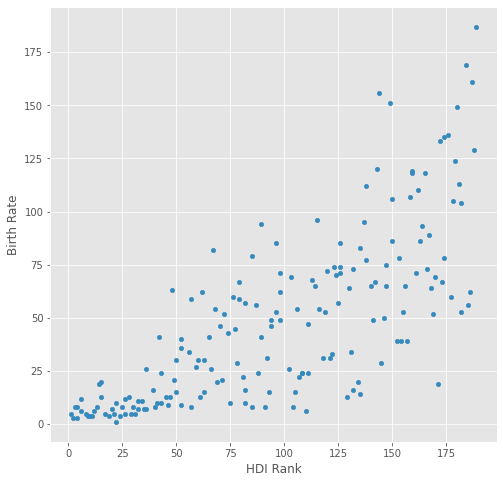

In [34]:
data.plot.scatter(x='HDI Rank', y='Birth Rate')

The scatterplot shows that the relationship between HDI Rank and Adolescent Birth Rate is curvilinear rather than linear. So performing a natural log transformation of the adolescent fertility rate should results in data with a more linear trend. 

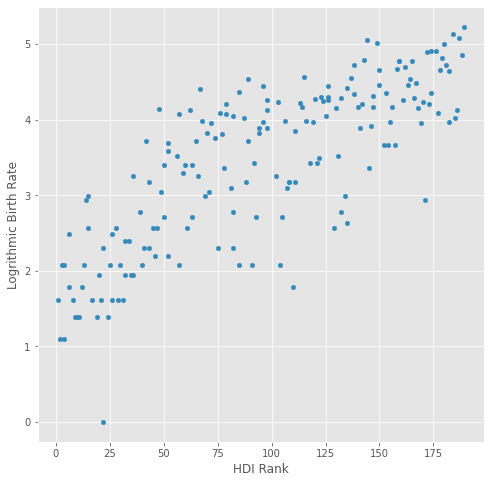

In [37]:
data['Logrithmic Birth Rate'] = np.log(data['Birth Rate'])
plt.plot.scatter(x='HDI Rank', y='Logrithmic Birth Rate')

## Linear Regression

Now that I have transformed the data to better reflect a linear relationship. I will now fit a linear regression model to the transformed data. 

In [46]:
x = data['HDI Rank'].values.reshape(-1,1)
y = data['Logrithmic Birth Rate'].to_list()

model = LinearRegression(fit_intercept=True, normalize=False)
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now that the model has been fitted, we can look at what is the coefficient and intercept for the line. 

In [71]:
model.coef_[0]

0.015450297067876647

In [50]:
model.intercept_

1.9451572709813025

So our linear regression model has best approximated the logrithmic adolescent fertility as:
$$ln(y)=0.015x + 1.94 +e$$
In order to see how good of a fit that line is I have plotted it against the scatter plot of HDI Rank vs. Logrithmic Birth Rate. 

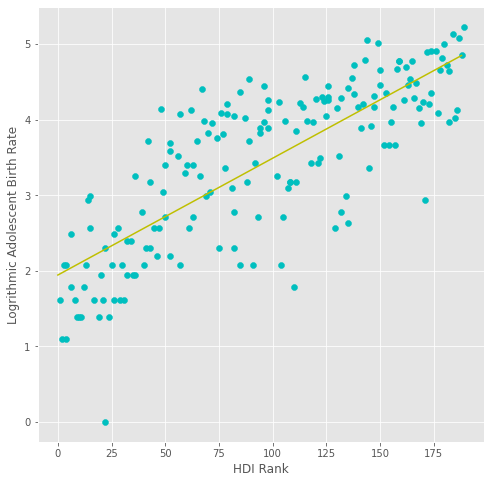

In [79]:
x = data['HDI Rank'].values.reshape(-1,1)
y = data['Logrithmic Birth Rate'].to_list()

lin_reg_x = [x for x in range(data['HDI Rank'].max())]
lin_reg_y = [model.coef_[0] * x + model.intercept_ for x in lin_reg_x]

plt.scatter(x, y, color='c')
plt.plot(lin_reg_x, lin_reg_y, color='y')
plt.xlabel('HDI Rank')
plt.ylabel('Logrithmic Adolescent Birth Rate')
plt.show()

The coefficient of determination, or $R^2$ value of 0.62 means that the Gender Inequality Index can explain more than 62% of the variation in adolescent fertility rates among the countries in our data set. 

In [81]:
model.score(x,y)

0.6246318907679496

The data does seem to be well approximated by a straight line, however, since we did do a logrithmic transformation on the birth rate, how will it look when we reverse that transformation on the linear function as well? In order to do so, we must raise both sides of the equation to the power of $e$. Doing so gives us, 
$$y = e^{0.015x+1.94}$$
Which has been plotted below as well. 

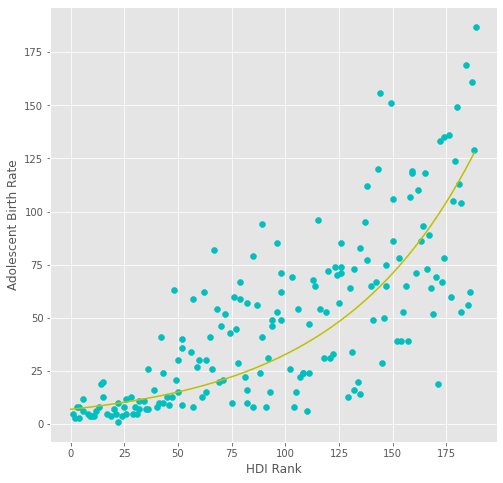

In [77]:
x = data['HDI Rank'].values.reshape(-1,1)
y = data['Birth Rate'].to_list()

exp_reg_x = [x for x in range(data['HDI Rank'].max())]
exp_reg_y = [math.exp(model.coef_[0] * x + model.intercept_) for x in exp_reg_x]

plt.scatter(x, y, color='c')
plt.plot(exp_reg_x, exp_reg_y, color='y')
plt.xlabel('HDI Rank')
plt.ylabel('Adolescent Birth Rate')
plt.show()

Although there is a lot of variance from the approximated line, particularly among the higher HDI Ranking countries, performing a linear regression on a logirithmically-transformed data set appears to be a well-fitting model used to predict the Adolescent Birth Rate of a country given the HDI Ranking. 